[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FerneyOAmaya//TransmissionLines/blob/master/EfectoPiel.ipynb)

# Efecto piel

Se presentan las características del efecto piel y se presenta un ejercicio interactivo empleando un conductor de área transversal circular.

Por:

Ferney Amaya Fernández
https://ferneyoamaya.github.io/


Contenido:
1. Descripción del efecto piel.
2. Ejercicio interactivo: efecto piel.

Referencias.

## 1.Descripción del efecto piel.

El efecto piel se observa en buenos conductores, cuando se cumple $tan \, \delta > 100$.

Cuando la onda electromagnética incide en un conductor, penetra una distancia $\delta$, dada por:

$$\large \delta = \frac{1}{\alpha} \, [m]$$<br>

donde:
- $\delta$ es la profundidad de penetración [m] <br>
- $\alpha$ es la constante de atenuación de la onda [1/m]

Esto indica que en un conductor que transporta corriente, la corriente se distribuye sobre la suerficie o piel del conductor, siendo el grosor de esa piel el valor $\delta$.

Cuando $z=\delta$, el valor del campo eléctrico a caido a un valor igual a:

$$ E = e^{-\alpha \delta} = e^{-1} = 0.37 \, V/m$$

0.37 veces su valor inicial.



## 2.Ejercicio interactivo.

Observemos el efecto piel en un conductor de cobre, en un cilindro de diferente radio. 
Lo parámetros del cobre:
- $\epsilon_r = 1$
- $\mu_r = 1$
- $\sigma = 5.8 \times 10^7$ [S/m]

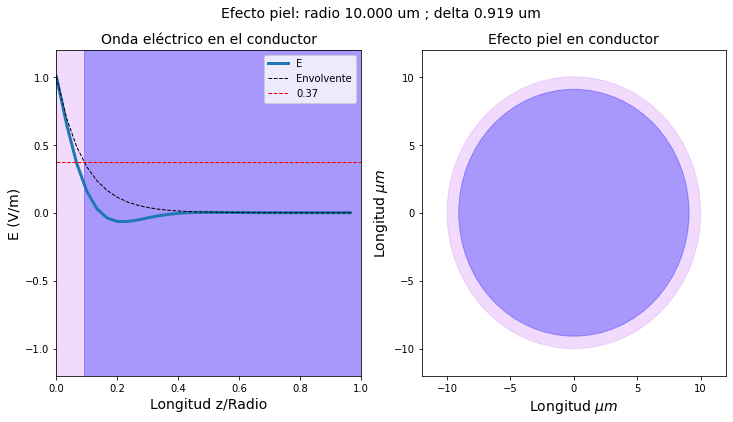

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Frecuencia_kHz = 10000  #@param {type: "slider", min: 100, max: 10000}
Radio_um = 10  #@param {type: "slider", min: 1, max: 10}

e0 = 8.8542e-12;
u0 = 1.2566e-6;
er = 1;
ur = 1;
sigma = 3e7;
Radio = Radio_um*1e-6;

omega = 2*np.pi*Frecuencia_kHz*1e6;
e = e0*er;
u = u0*ur;
tand = sigma/(omega*e);
alpha = omega*np.sqrt(u*e/2)*np.sqrt(np.sqrt(1+tand**2)-1);
beta  = omega*np.sqrt(u*e/2)*np.sqrt(np.sqrt(1+tand**2)+1);
delta = 1/alpha
lambd = 2*np.pi/beta

z = np.arange(0, Radio, Radio/30)
Env = np.exp(-alpha*z)
Ezp = Env*np.cos(-beta*z)

if delta>=Radio:
  Rin = Radio
else:
  Rin = delta

f, ax = plt.subplots(1, 2, figsize=(12, 6))

rec_r = plt.Rectangle((0, -1.2), 1, 2.4, color='#d187f5',alpha=0.3)
rec_b = plt.Rectangle((Rin/Radio, -1.2), 1-Rin/Radio, 2.4, color='b',alpha=0.3)
ax[0].add_artist(rec_r)
ax[0].add_artist(rec_b)

ax[0].plot(z/Radio, Ezp,label='E',lw=3)
ax[0].plot(z/Radio, Env,'k--',label='Envolvente',lw=1)
ax[0].plot([0, 1], [0.37, 0.37], 'r--', lw=1, label='0.37')

ax[0].axis([0, 1, -1.2, 1.2])
ax[0].set_xlabel('Longitud z/Radio', fontsize=14)
ax[0].set_ylabel('E (V/m)', fontsize=14)
ax[0].legend()
ax[0].set_title('Onda eléctrico en el conductor', fontsize=14)

cir_total = plt.Circle((0, 0), Radio*1e6, color='#d187f5', alpha=0.3)
cir_piel = plt.Circle((0, 0), (Radio-Rin)*1e6, color='b', alpha=0.3)

ax[1].axis([-12, 12, -12, 12])
ax[1].add_artist(cir_total)
ax[1].add_artist(cir_piel)
ax[1].set_xlabel('Longitud $\mu m$', fontsize=14)
ax[1].set_ylabel('Longitud $\mu m$', fontsize=14)
ax[1].set_title('Efecto piel en conductor', fontsize=14)

f.suptitle('Efecto piel: radio %.3f um ; delta %.3f um' % (Radio/1e-6,delta/1e-6), fontsize=14)
f.show()
#print('radio : %.3f um ; delta : %.3f um' % (Radio/1e-6,delta/1e-6))

## Referencias

- Engineering Electromagnetic Fields and Waves (Inglés) 2nd Edición. Carl T. A. Johnk.